In [242]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matlab
import matlab.engine
import seaborn as sns
import pickle
sns.set()

In [88]:
corp_bond = pd.read_csv('./Desktop/bond_factor.csv',index_col = 0)
corp_bond = corp_bond.iloc[1:,-3:] / 100

In [89]:
corp_bond.head(5)

,HighYield_Investment,TIP_10Yr,TermStructure
Date,,,
2008-01-31,-0.049055,0.002168,0.017012
2008-02-29,-0.027340,0.001835,0.002060
2008-03-31,0.010619,-0.014772,0.010838
2008-04-30,0.024794,0.010177,-0.015799
2008-05-31,0.025924,0.018844,-0.014314


In [92]:
gov_bond = pd.read_csv('./Desktop/gov_bond_factor.csv',index_col = 0).dropna()
gov_bond = gov_bond / 100

In [93]:
gov_bond.head(5)

,TIP_10Yr,TermStructure
Date,,
1/31/08,0.002168,0.017012
2/29/08,0.001835,0.002060
3/31/08,-0.014772,0.010838
4/30/08,0.010177,-0.015799
5/31/08,0.018844,-0.014314


In [40]:
US_equity = pd.read_csv('./Desktop/US_FF3_M.CSV',index_col = 0)
US_equity = US_equity.iloc[:,:3]/100


In [41]:
US_equity.head(5)

,Mkt-RF,SMB,HML
192607,0.0296,-0.0230,-0.0287
192608,0.0264,-0.0140,0.0419
192609,0.0036,-0.0132,0.0001
192610,-0.0324,0.0004,0.0051
192611,0.0253,-0.0020,-0.0035


In [98]:
global_equity = pd.read_csv('./Desktop/Global_ex_US_3_Factors.csv', index_col = 0)
global_equity = global_equity.iloc[:,:3]/100


In [99]:
global_equity.head(5)

,Mkt-RF,SMB,HML
200010,-0.0449,-0.0582,0.0746
200011,-0.0420,-0.0116,0.0968
200012,0.0137,-0.0003,0.0498
200101,0.0038,0.0122,-0.0168
200102,-0.0787,0.0420,0.0947


In [102]:
emerging_equity = pd.read_csv('./Desktop/EmergingEq_factor.csv', index_col = 0).dropna()
emerging_equity = emerging_equity.iloc[:,-2:]/100

In [103]:
emerging_equity.head(5)

,Size,Value
Date,,
2008-01-31,-0.005966,-0.006291
2008-02-29,0.026448,-0.002535
2008-03-31,0.034171,-0.004187
2008-04-30,-0.057232,-0.007457
2008-05-31,-0.040980,-0.066910


In [83]:
def make_mean_matrix(data, window):
    result = data.rolling(window = window).mean().dropna(how = 'any', axis = 0)
    return result

def make_cov_matrix(data, window):
    result = data.rolling(window = window).cov().to_panel().dropna(how = 'any', axis = 1).swapaxes(0,1)
    return result

In [106]:
corp_bond_mean = make_mean_matrix(corp_bond,12)
corp_bond_cov = make_cov_matrix(corp_bond,12)

gov_bond_mean = make_mean_matrix(gov_bond,12)
gov_bond_cov = make_cov_matrix(gov_bond,12)

US_equity_mean = make_mean_matrix(US_equity,12)
US_equity_cov = make_cov_matrix(US_equity,12)

global_equity_mean = make_mean_matrix(global_equity,12)
global_equity_cov = make_cov_matrix(global_equity,12)

emerging_equity_mean = make_mean_matrix(emerging_equity,12)
emerging_equity_cov = make_cov_matrix(emerging_equity,12)

In [113]:
def optimize_portfolio(mean,cov,rf=0,lb=0,ub=1,target=1):
    rf, lb, ub, target = float(rf),float(lb),float(ub),float(target)
    result = pd.DataFrame(index = mean.index, columns = mean.columns)
    for i in result.index:
        test_mean = matlab.double(mean.loc[i].values.tolist())
        test_cov = matlab.double(cov.loc[i].values.tolist())
        result.loc[i] = np.array(eng.calculate_portfolio(rf, test_mean, test_cov, lb, ub, target)).T[0]
    return result

In [116]:
eng = matlab.engine.connect_matlab()

In [185]:
corp_bond_portfolio = optimize_portfolio(corp_bond_mean,corp_bond_cov)
gov_bond_portfolio = optimize_portfolio(gov_bond_mean,gov_bond_cov)
US_equity_portfolio = optimize_portfolio(US_equity_mean,US_equity_cov)
global_equity_portfolio = optimize_portfolio(global_equity_mean,global_equity_cov)
emerging_equity_portfolio = optimize_portfolio(emerging_equity_mean,emerging_equity_cov)

In [243]:
with open('result.pkl','wb') as f:
    agg = [corp_bond_portfolio,gov_bond_portfolio,US_equity_portfolio,global_equity_portfolio,emerging_equity_portfolio]
    pickle.dump(agg,f)

In [ ]:
corp_bond_portfolio = optimize_portfolio(corp_bond_mean,corp_bond_cov)
gov_bond_portfolio = optimize_portfolio(gov_bond_mean,gov_bond_cov)
US_equity_portfolio = optimize_portfolio(US_equity_mean,US_equity_cov)
global_equity_portfolio = optimize_portfolio(global_equity_mean,global_equity_cov)
emerging_equity_portfolio = optimize_portfolio(emerging_equity_mean,emerging_equity_cov)

In [232]:
def backtest(portfolio,mean):
    return ((portfolio.shift(1) * mean).fillna(0).sum(axis = 1) + 1).cumprod()

In [233]:
corp_bond_curve = backtest(corp_bond_portfolio, corp_bond_mean)
gov_bond_curve = backtest(gov_bond_portfolio, gov_bond_mean)
US_equity_curve = backtest(US_equity_portfolio, US_equity_mean)
global_equity_curve = backtest(global_equity_portfolio, global_equity_mean)
emerging_equity_curve = backtest(emerging_equity_portfolio, emerging_equity_mean)

In [234]:
US_equity_curve.index = pd.to_datetime(US_equity_curve.index,format='%Y%m')
global_equity_curve.index = pd.to_datetime(global_equity_curve.index,format='%Y%m')

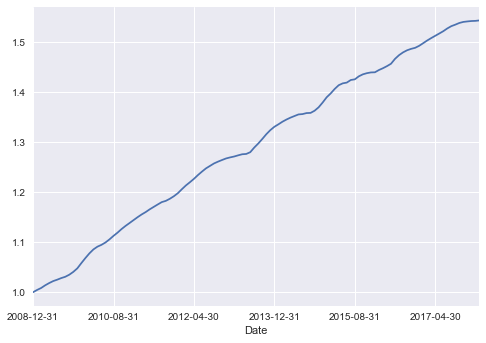

In [236]:
corp_bond_curve.plot()
plt.show()

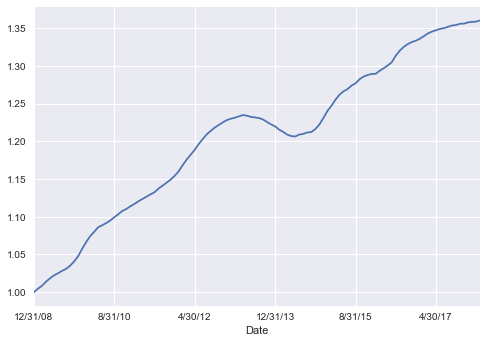

In [237]:
gov_bond_curve.plot()
plt.show()

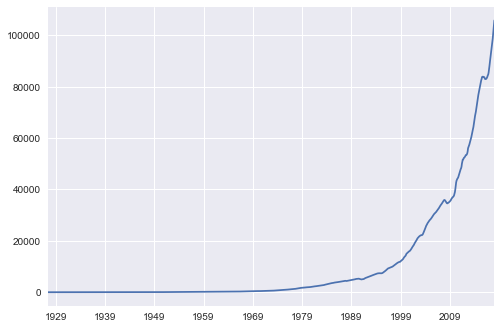

In [238]:
US_equity_curve.plot()
plt.show()

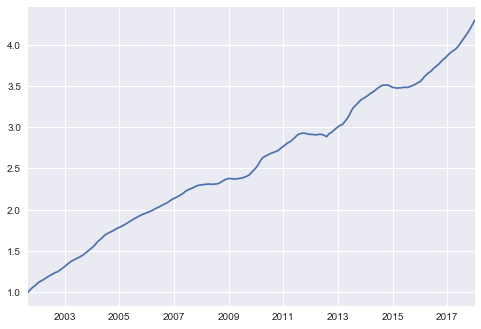

In [239]:
global_equity_curve.plot()
plt.show()

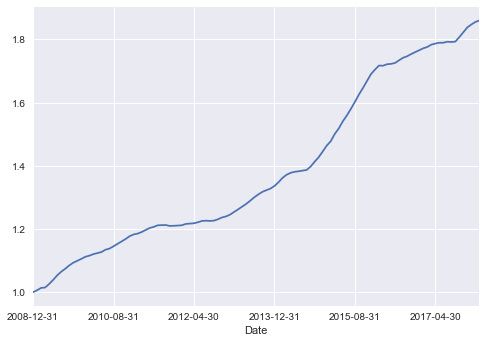

In [240]:
emerging_equity_curve.plot()
plt.show()

In [246]:
corp_bond_portfolio_ls = optimize_portfolio(corp_bond_mean,corp_bond_cov,0,-1,1,1)
gov_bond_portfolio_ls = optimize_portfolio(gov_bond_mean,gov_bond_cov,0,-1,1,1)
US_equity_portfolio_ls = optimize_portfolio(US_equity_mean,US_equity_cov,0,-1,1,1)
global_equity_portfolio_ls = optimize_portfolio(global_equity_mean,global_equity_cov,0,-1,1,1)
emerging_equity_portfolio_ls = optimize_portfolio(emerging_equity_mean,emerging_equity_cov,0,-1,1,1)

In [247]:
corp_bond_curve_ls = backtest(corp_bond_portfolio_ls, corp_bond_mean)
gov_bond_curve_ls = backtest(gov_bond_portfolio_ls, gov_bond_mean)
US_equity_curve_ls = backtest(US_equity_portfolio_ls, US_equity_mean)
global_equity_curve_ls = backtest(global_equity_portfolio_ls, global_equity_mean)
emerging_equity_curve_ls = backtest(emerging_equity_portfolio_ls, emerging_equity_mean)

In [ ]:
US_equity_portfolio.index = pd.to_datetime(US_equity_portfolio.index,format='%Y%m')
global_equity_portfolio.index = pd.to_datetime(global_equity_portfolio.index,format='%Y%m')

In [248]:
US_equity_curve_ls.index = pd.to_datetime(US_equity_curve_ls.index,format='%Y%m')
global_equity_curve_ls.index = pd.to_datetime(global_equity_curve_ls.index,format='%Y%m')

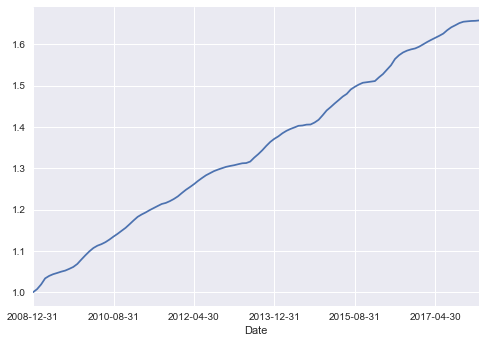

In [249]:
corp_bond_curve_ls.plot()
plt.show()

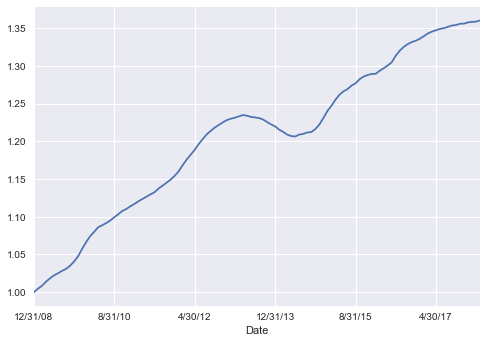

In [250]:
gov_bond_curve_ls.plot()
plt.show()

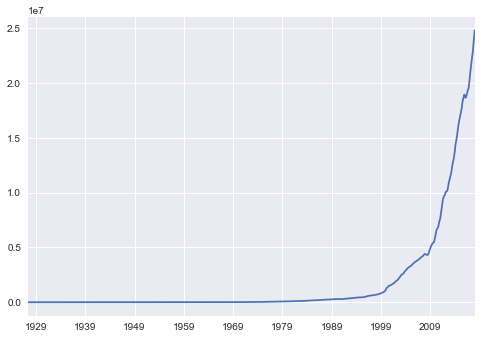

In [251]:
US_equity_curve_ls.plot()
plt.show()

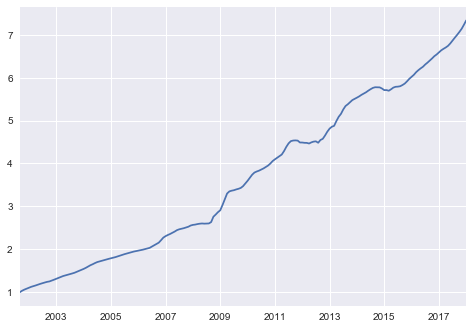

In [252]:
global_equity_curve_ls.plot()
plt.show()

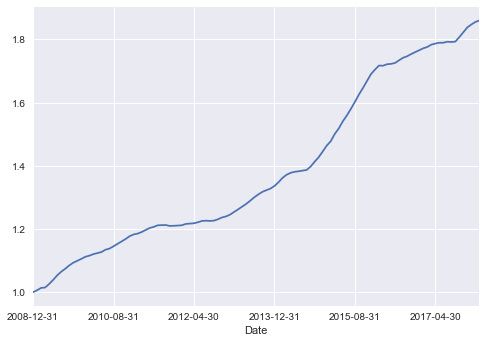

In [253]:
emerging_equity_curve_ls.plot()
plt.show()

In [255]:
corp_bond_portfolio_unlimited = optimize_portfolio(corp_bond_mean,corp_bond_cov,0,-100,100,1)
gov_bond_portfolio_unlimited = optimize_portfolio(gov_bond_mean,gov_bond_cov,0,-100,100,1)
US_equity_portfolio_unlimited = optimize_portfolio(US_equity_mean,US_equity_cov,0,-100,100,1)
global_equity_portfolio_unlimited = optimize_portfolio(global_equity_mean,global_equity_cov,0,-100,100,1)
emerging_equity_portfolio_unlimited = optimize_portfolio(emerging_equity_mean,emerging_equity_cov,0,-100,100,1)

In [263]:
corp_bond_portfolio_unlimited

,HighYield_Investment,TIP_10Yr,TermStructure
Date,,,
2008-12-31,-9.63546,-89.3645,100
2009-01-31,-65.7151,-33.2849,100
2009-02-28,-64.8251,-34.1749,100
2009-03-31,-1.95712,0.179295,2.77783
2009-04-30,17.3739,-100,83.6261
2009-05-31,14.3917,-100,86.6083
2009-06-30,17.9919,-100,83.0081
2009-07-31,30.7592,-100,70.2408
2009-08-31,22.415,-100,78.585


In [269]:
pd.to_datetime(gov_bond_curve.index)

DatetimeIndex(['2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31',
               '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31',
               '2009-08-31', '2009-09-30',
               ...
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

In [275]:
gov_bond_portfolio.index = pd.to_datetime(gov_bond_portfolio.index)

In [277]:
corp_bond_portfolio.index = pd.to_datetime(corp_bond_portfolio.index)

In [283]:
US_equity_portfolio.index = pd.to_datetime(US_equity_portfolio.index, format='%Y%m')

In [286]:
emerging_equity_portfolio.index = pd.to_datetime(emerging_equity_portfolio.index)

In [288]:
global_equity_portfolio.index = pd.to_datetime(global_equity_portfolio.index, format='%Y%m')

In [291]:
corp_bond_portfolio_selected = corp_bond_portfolio['2009-01':'2017-12']
gov_bond_portfolio_selected = gov_bond_portfolio['2009-01':'2017-12']
US_equity_portfolio_selected = US_equity_portfolio['2009-01':'2017-12']
emerging_equity_portfolio_selected = emerging_equity_portfolio['2009-01':'2017-12']
global_equity_portfolio_selected = global_equity_portfolio['2009-01':'2017-12']

In [321]:
gov_bond_mean.index = pd.to_datetime(gov_bond_mean.index)
corp_bond_mean.index = pd.to_datetime(corp_bond_mean.index)
US_equity_mean.index = pd.to_datetime(US_equity_mean.index, format='%Y%m')
emerging_equity_mean.index = pd.to_datetime(emerging_equity_mean.index)
global_equity_mean.index = pd.to_datetime(global_equity_mean.index, format='%Y%m')

In [324]:
gov_bond_mean_selected = gov_bond_mean['2009-01':'2017-12']
corp_bond_mean_selected = corp_bond_mean['2009-01':'2017-12']
US_equity_mean_selected = US_equity_mean['2009-01':'2017-12']
emerging_equity_mean_selected = emerging_equity_mean['2009-01':'2017-12']
global_equity_mean_selected = global_equity_mean['2009-01':'2017-12']

In [388]:
US_equity_mean_selected = US_equity_mean_selected.to_period('M').to_timestamp('M')
global_equity_mean_selected = global_equity_mean_selected.to_period('M').to_timestamp('M')
US_equity_portfolio_selected = US_equity_portfolio_selected.to_period('M').to_timestamp('M')
global_equity_portfolio_selected = global_equity_portfolio_selected.to_period('M').to_timestamp('M')

In [293]:
# corp_bond_curve_selected = backtest(corp_bond_portfolio_selected, corp_bond_mean)
# gov_bond_curve_selected = backtest(gov_bond_portfolio_selected, gov_bond_mean)
# US_equity_curve_selected = backtest(US_equity_portfolio_selected, US_equity_mean)
# global_equity_curve_selected = backtest(global_equity_portfolio_selected, global_equity_mean)
# emerging_equity_curve_selected = backtest(emerging_equity_portfolio_selected, emerging_equity_mean)

In [ ]:
def backtest(portfolio,mean):
    return ((portfolio.shift(1) * mean).fillna(0).sum(axis = 1) + 1).cumprod()

In [389]:
def backtest_all(weight, *args):
    w1,w2,w3,w4,w5 = weight
    if w1+w2+w3+w4+w5 != 1: raise ValueError
    p1,p2,p3,p4,p5,r1,r2,r3,r4,r5 = args
    s1 = (p1.shift(1) * r1).fillna(0).sum(axis = 1)
    s2 = (p2.shift(1) * r2).fillna(0).sum(axis = 1)
    s3 = (p3.shift(1) * r3).fillna(0).sum(axis = 1)
    s4 = (p4.shift(1) * r4).fillna(0).sum(axis = 1)
    s5 = (p5.shift(1) * r5).fillna(0).sum(axis = 1)
#     print(w3,s3)
    f = w1 * s1 + w2 * s2 + w3 * s3
#     print(f)
    final = (f+1).cumprod()
    return final

In [418]:
corp_bond_portfolio_benchmark = corp_bond_portfolio_selected.copy()
corp_bond_portfolio_benchmark[:] = 1/3
gov_bond_portfolio_benchmark = gov_bond_portfolio_selected.copy() 
gov_bond_portfolio_benchmark[:] = 0.5
US_equity_portfolio_benchmark = US_equity_portfolio_selected.copy()
US_equity_portfolio_benchmark[:] = 1/3
global_equity_portfolio_benchmark = global_equity_portfolio_selected.copy()
global_equity_portfolio_benchmark[:] = 1/3
emerging_equity_portfolio_benchmark = emerging_equity_portfolio_selected.copy()
emerging_equity_portfolio_benchmark[:] = 0.5

In [419]:
final_result_benchmark = backtest_all([0.1,0.1,0.3,0.3,0.2],corp_bond_portfolio_benchmark,gov_bond_portfolio_benchmark,
             US_equity_portfolio_benchmark,global_equity_portfolio_benchmark,emerging_equity_portfolio_benchmark,
            corp_bond_mean_selected,gov_bond_mean_selected,US_equity_mean_selected,global_equity_mean_selected
                            ,emerging_equity_mean_selected)

In [398]:
final_result = backtest_all([0.1,0.1,0.3,0.3,0.2],corp_bond_portfolio_selected,gov_bond_portfolio_selected,
             US_equity_portfolio_benchmark,global_equity_portfolio_selected,emerging_equity_portfolio_selected,
            corp_bond_mean_selected,gov_bond_mean_selected,US_equity_mean_selected,global_equity_mean_selected
                            ,emerging_equity_mean_selected)

In [422]:
final_result_benchmark.to_csv('final_result_benchmark.csv')
final_result.to_csv('final_result.csv')

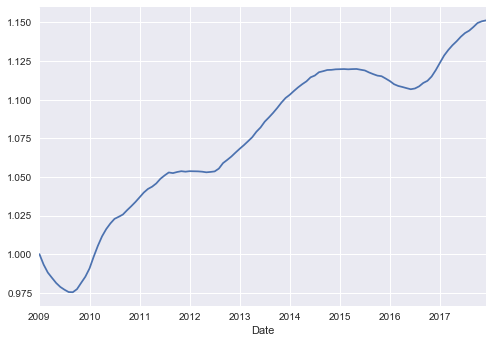

In [420]:
final_result_benchmark.plot()
plt.show()

In [421]:
calc_sharpe_ratio(final_result_benchmark)

2.0618875408988648

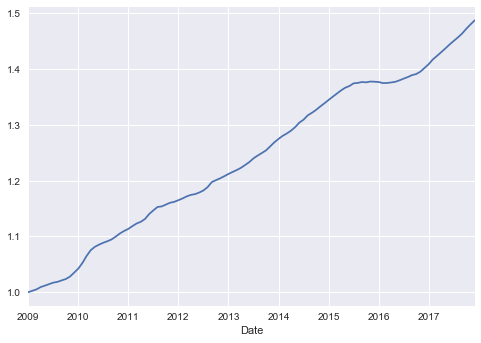

In [402]:
final_result.plot()
plt.show()

In [393]:
def calc_sharpe_ratio(seq):
    seq = seq.pct_change().fillna(0)
    return np.mean(seq) / np.std(seq) * np.sqrt(12)

In [400]:
calc_sharpe_ratio(final_result)

5.0952894058048974